# Easy21 via Reinforcement Learning Techniques

This notebook investigates the implementation of various reinforcement learning techniques against the game "Easy21" illustrated by [this](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/Easy21-Johannes.pdf) assignment under the RL course by Professor David Silver at UCL.



In [1]:
import simulation
import environment
import player
import q_players
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
#Utility Functions

#Prints metrics based on the simulation
def print_metrics(metrics_dictionary):
    print("Win Rate: {:.2f}%\nDraw Rate:{:.2f}%\nLoss Rate: {:.2f}%"
          .format(metrics_dictionary['win_rate']*100,
                  metrics_dictionary['draw_rate']*100,
                  metrics_dictionary['loss_rate']*100))
    
    


## Baseline Performance

We will use 2 simple, hardcoded agents to measure baseline performance.

### Random Agent
The basic player chooses its actions purely randomly. This is an important measure to have when evaluating the performance of learning agents. This way, at least a modest improvement over the basic player shows that the learning algorithm is somewhat effective.

### Naive Agent
The naive agent will choose its actions based on a simple heuristic: If the player has a sum of 16 or higher, the agent will stick. Hopefully, a learning agent will learn a better (and perhaps more complex) policy. 



In [3]:
#Initialize the players
naive_player = player.Naive_Player()
random_player = player.Basic_Player()

#Initialize the environment
env = environment.Easy21_Environment()



In [3]:
#Number of games to be played
n_games = 10000

print("Simulating Naive Agent")
naive_rewards = simulation.simulate(naive_player,env,n_trials=n_games,verbose=True)
print()
print("Simulating Random Agent...")
random_rewards = simulation.simulate(random_player,env,n_trials=n_games,verbose=True)

Simulating Naive Agent
Loading game 2000
Loading game 4000
Loading game 6000
Loading game 8000
Loading game 10000

Simulating Random Agent...
Loading game 2000
Loading game 4000
Loading game 6000
Loading game 8000
Loading game 10000


In [11]:


random_metrics = simulation.process_simulation_metrics(random_rewards)
naive_metrics = simulation.process_simulation_metrics(naive_rewards)


print ("Random Agent Metrics:")
print_metrics(random_metrics)
print("-------------------------------------------")
print("Naive Agent Metrics:")
print_metrics(naive_metrics)


Random Agent Metrics:
Win Rate: 25.43%
Draw Rate:3.83%
Loss Rate: 70.74%
-------------------------------------------
Naive Agent Metrics:
Win Rate: 39.85%
Draw Rate:11.28%
Loss Rate: 48.87%


### Baseline Performance Results
We can see that the random agent wins against the dealer about 25% of the time and loses about 71% of the time, with a very small draw rate.
Where the Naive agent wins about 40% of the time and loses about 49% of the time, with a much larger draw rate of 11%.

These criteria will be our benchmarks against the upcoming learning agents


## Evaluating a Monte-Carlo Q-Learner
The first learning agent we will evaluate is a traditional table based Q-Learner. Of the algorithms we will evaluate, we should expect this to be the best. This is because the state space of Easy21 is very small (110 states), which should allow every state's Q-Value to converge on the true value given enough training time. The Monte-Carlo method should guarantee convergence in this scenario.

First we will train the Q-Learner using epsilon and alpha decay. We'll set the number of trials to one hundred thousand, which should allow every state to be visited a reasonable number of times. 

Then we'll turn learning off and have the agent play based on the policy that it has evaluated.

In [12]:
##Utility function for training and testing learning agents
def run_simulations(agent,environment,train_trials=100000,test_trials=10000,verbose=True):
    print("Simulating in Training Mode")
    simulation.simulate(agent,environment,n_trials=train_trials,verbose=verbose)
    
    print("Simulating in Testing Mode")
    agent.setLearning(False)
    results = simulation.simulate(agent,environment,n_trials=test_trials,verbose=verbose)
    
    return results



train_trials = 100000
test_trials = 10000
#Train Q Learner

q_learner = q_players.QLearner_Basic()

results = run_simulations(q_learner,env,train_trials,test_trials,verbose=True)

Simulating in Training Mode
Loading game 20000
Loading game 40000
Loading game 60000
Loading game 80000
Loading game 100000
Simulating in Testing Mode


In [13]:
q_metrics = simulation.process_simulation_metrics(results)
print_metrics(q_metrics)

Win Rate: 40.76%
Draw Rate:11.56%
Loss Rate: 47.68%


### Plotting the value space

The learned value space of the game can be plotted by the function below.


In [17]:
def plot_value_space(agent):
    ##Cumulative wins
    dealer_range = range(1,11)
    player_sum = range(11,22)
    value_space = np.zeros([len(dealer_range)*len(player_sum),3])
    
    count = 0
    for dealer_start in dealer_range:
        for p_sum in player_sum:
            q_value = agent.get_Q_value((dealer_star))
            value_space[count,:] = [dealer_start,p_sum,q_value]
            count+=1
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.plot_trisurf(value_space[:,0],value_space[:,1],value_space[:,2])
    

### Plotting the value space
The agents estimated value of this space is plotted below. The value (shown on the z-axis) can be interpreted as the agent's belief it will win the game based on the current game state (represented by the x and y axes) 


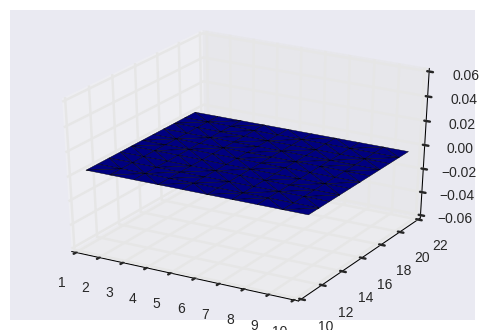

In [18]:
plot_value_space(q_learner)

In [19]:
q_learner.Q_Table

defaultdict(dict,
            {(1, 11): {'hit': -0.05480104558861712,
              'stick': -0.6296296296296297},
             (1, 12): {'hit': -0.12709143481109053,
              'stick': -0.565217391304348},
             (1, 13): {'hit': -0.16846701916882123,
              'stick': -0.5272727272727269},
             (1, 14): {'hit': -0.21918382444507456,
              'stick': -0.5894039735099339},
             (1, 15): {'hit': -0.2737066733571065,
              'stick': -0.6385542168674697},
             (1, 16): {'hit': -0.2924855039475222,
              'stick': -0.5514018691588782},
             (1, 17): {'hit': -0.34678312962878705,
              'stick': -0.3279181708784599},
             (1, 18): {'hit': -0.4100278786854778,
              'stick': 0.013037809647979138},
             (1, 19): {'hit': -0.5314685314685313,
              'stick': 0.3434125269978402},
             (1, 20): {'hit': -0.527318859635533, 'stick': 0.6588124410933083},
             (1, 21): {'hit': -0.7